In [15]:
%reload_ext autoreload
%autoreload
%matplotlib inline
import os, json,glob,sys,io
from types import SimpleNamespace
from experiment import run_model
from eval import calculate_stats, eval_model
import pickle
from datetime import datetime 
import torch
from torch import nn
from transformers import BertTokenizer
from model.MedClinical import Biobert_fc 
from sklearn.metrics import classification_report, f1_score
from util.tools  import load_config
from util.DataLoader  import *
from pathlib import Path, PureWindowsPath, PurePosixPath
import traceback
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [16]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = "cpu"

In [17]:
config_folder = "config/"
config = load_config(config_folder)

training metric file outputs\re\BioBERT_fc2020-12-01 01_45_07_246692_train_metrics_.pkl
training metric file outputs\re\BioBERT_fc2020-12-01 05_11_03_354130_train_metrics_.pkl
training metric file outputs\re\BioBERT_fc2020-12-01 09_23_56_826433_train_metrics_.pkl
training metric file outputs\re\BioBERT_fc2020-12-01 11_05_20_983004_train_metrics_.pkl
training metric file outputs\re\BioBERT_fc2020-12-01 12_27_58_989702_train_metrics_.pkl
training metric file outputs\re\BioBERT_fc2020-12-01 13_50_38_588429_train_metrics_.pkl
training metric file outputs\re\BioBERT_fc2020-12-01 14_58_53_461856_train_metrics_.pkl
training metric file outputs\re\BioBERT_fc2020-12-01 15_50_44_961560_train_metrics_.pkl
training metric file outputs\re\BioBERT_fc2020-12-01 17_10_28_572381_train_metrics_.pkl
training metric file outputs\re\BioBERT_fc2020-12-01 18_33_12_493374_train_metrics_.pkl
training metric file outputs\re\BioBERT_fc2020-12-01 19_55_57_111118_train_metrics_.pkl
training metric file outputs\re\

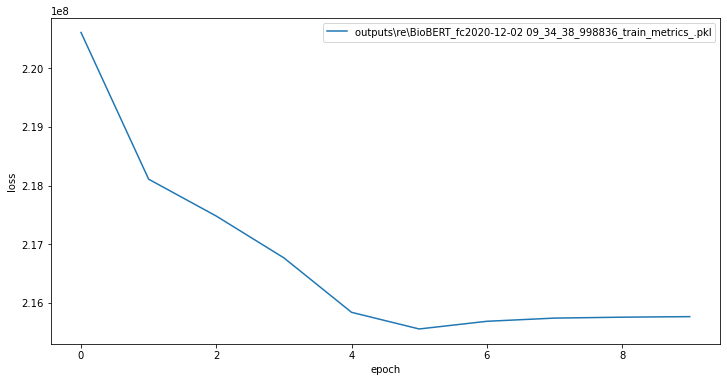

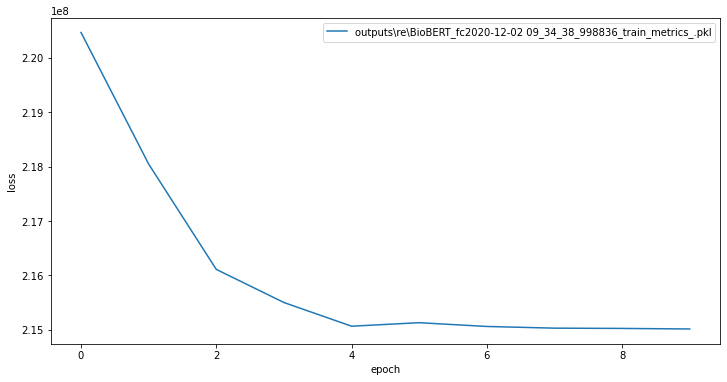

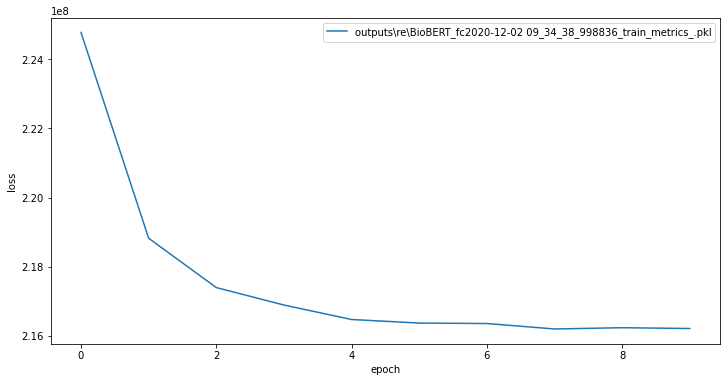

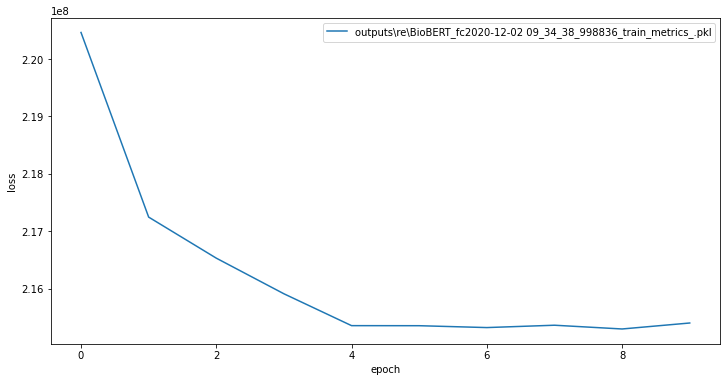

In [27]:
models_folder_name = config.programsettings.OUTPUT_DIR
data_folder = Path(models_folder_name)
list_train_metrics = list(data_folder.glob('*.pkl'))
num_labels = 9

f1_score_list = []
file_list = []
for metrics_file in list_train_metrics:
    print('training metric file', metrics_file)
    if str(metrics_file).find('BioBERT_fc2020-12-02 09_34_38_998836_train_metrics_.pkl') > 0 or \
       str(metrics_file).find('BioBERT_fc2020-12-02 13_57_07_782209_train_metrics_.pkl') > 0 or \
       str(metrics_file).find('BioBERT_fc2020-12-02 18_26_24_915325_train_metrics_.pkl') > 0  or \
       str(metrics_file).find('BioBERT_fc2020-12-02 22_55_51_743142_train_metrics_.pkl') > 0:
        file_list.append(metrics_file)
        with open(metrics_file,"rb") as f:
            train_metric = pickle.load(f)
            print(train_metric)

        print("\n \n \n")
        plt.figure(figsize=(12,6))
        plt.plot(np.array(train_metric)[:,0], np.array(train_metric)[:,1])
        plt.xlabel("epoch")
        plt.ylabel("loss")
        plt.legend(file_list, loc='upper right')
    